In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('ab_test-redesign_sample_b.csv')

In [54]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [55]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61383 non-null  object 
 1   cid           61383 non-null  float64
 2   transactions  61383 non-null  int64  
 3   revenue       61383 non-null  int64  
 4   group         61383 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [56]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [57]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [58]:
sample_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61383 entries, 0 to 61382
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61383 non-null  datetime64[ns]
 1   cid           61383 non-null  float64       
 2   transactions  61383 non-null  int64         
 3   revenue       61383 non-null  int64         
 4   group         61383 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [59]:
sample_a.head(2)

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A


In [60]:
sample_b.head(2)

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B


Постройте таблицу со следующими ежедневными показателями:

* количество посетителей сайта;
* суммарное число транзакций;
* общая сумма покупок (выручка).

Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

In [61]:
sample_a_gr = sample_a.groupby(['date']).agg(
    {
        'cid':'count',
        'transactions':'sum',
        'revenue':'sum'
    }    
).reset_index().rename(columns={'cid': 'users_count'})    

sample_a_gr.head(3)

,date,users_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051


Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

In [62]:
sample_a_gr[sample_a_gr['date'] == '2020-11-08']

,date,users_count,transactions,revenue
2,2020-11-08,3354,25,846051


In [63]:
sample_b_gr = sample_b.groupby(['date']).agg(
    {
        'cid':'count',
        'transactions':'sum',
        'revenue':'sum'
    }    
).reset_index().rename(columns={'cid': 'users_count'})      

sample_b_gr.head(3)

,date,users_count,transactions,revenue
0,2020-11-06,2499,19,996645
1,2020-11-07,2804,19,555499
2,2020-11-08,3291,24,3044842


Добавьте в каждую из таблиц кумулятивные метрики:

* кумулятивное количество посетителей сайта;
* кумулятивное суммарное число транзакций;
* кумулятивная общая сумма покупок (кумулятивная выручка).

Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

In [64]:
sample_a_gr.head(3)

,date,users_count,transactions,revenue
0,2020-11-06,2576,16,1577279
1,2020-11-07,2704,23,1721886
2,2020-11-08,3354,25,846051


In [65]:
# считаем кумулятивное количество посетителей
sample_a_gr['users_count_cum'] = sample_a_gr['users_count'].cumsum()

# считаем кумулятивное число транзакций
sample_a_gr['transactions_cum'] = sample_a_gr['transactions'].cumsum()

# считаем кумулятивную выручку
sample_a_gr['revenue_cum'] = sample_a_gr['revenue'].cumsum()

In [66]:
sample_a_gr.head(3)

,date,users_count,transactions,revenue,users_count_cum,transactions_cum,revenue_cum
0,2020-11-06,2576,16,1577279,2576,16,1577279
1,2020-11-07,2704,23,1721886,5280,39,3299165
2,2020-11-08,3354,25,846051,8634,64,4145216


In [67]:
# считаем кумулятивное количество посетителей
sample_b_gr['users_count_cum'] = sample_b_gr['users_count'].cumsum()

# считаем кумулятивное число транзакций
sample_b_gr['transactions_cum'] = sample_b_gr['transactions'].cumsum()

# считаем кумулятивную выручку
sample_b_gr['revenue_cum'] = sample_b_gr['revenue'].cumsum()

In [68]:
sample_b_gr.head(3)

,date,users_count,transactions,revenue,users_count_cum,transactions_cum,revenue_cum
0,2020-11-06,2499,19,996645,2499,19,996645
1,2020-11-07,2804,19,555499,5303,38,1552144
2,2020-11-08,3291,24,3044842,8594,62,4596986


4.7 Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [69]:
sample_a_gr.tail(3)

,date,users_count,transactions,revenue,users_count_cum,transactions_cum,revenue_cum
15,2020-11-21,3116,18,939670,54815,382,23845366
16,2020-11-22,3298,33,1205426,58113,415,25050792
17,2020-11-23,3458,26,858274,61571,441,25909066


In [70]:
sample_b_gr.tail(3)

,date,users_count,transactions,revenue,users_count_cum,transactions_cum,revenue_cum
15,2020-11-21,3129,22,2586267,54512,399,29089195
16,2020-11-22,3378,34,1779841,57890,433,30869036
17,2020-11-23,3493,30,1585306,61383,463,32454342


In [75]:
sample_a_gr['conversion_cum'] = sample_a_gr['transactions_cum']/sample_a_gr['users_count_cum']*100

In [76]:
sample_b_gr['conversion_cum'] = sample_b_gr['transactions_cum']/sample_b_gr['users_count_cum']*100

In [77]:
sample_a_gr['conversion_cum'].mean()

0.7127554606160045

In [78]:
sample_b_gr['conversion_cum'].mean()

0.7621783890588011

4.8

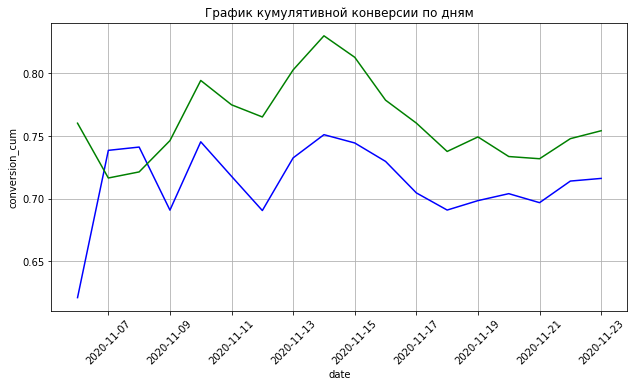

In [83]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='conversion_cum', data=sample_a_gr, ax=ax, color='blue')
sns.lineplot(x='date', y='conversion_cum', data=sample_b_gr, ax=ax, color='green')
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

Начиная с 9 ноября 2020 года конверсии в группах имеют приблизительно идентичное поведение (одинаковые точки роста и спада). При этом конверсия в группе B стабильно выше конверсии в группе A на данном периоде.

Задание 4.9

Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

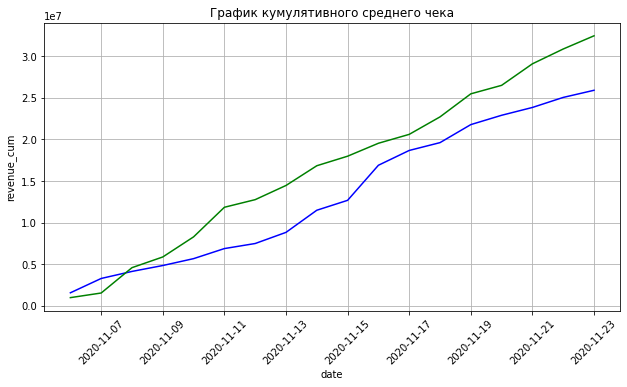

In [85]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='revenue_cum', data=sample_a_gr, ax=ax, color='blue')
sns.lineplot(x='date', y='revenue_cum', data=sample_b_gr, ax=ax, color='green')
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);